# **Convolutional Neural Network Notebook**

## Objectives
Answer business requirement 2:
The client is interested in predicting if a cherry leaf is healthy or contains powdery mildew.

## Inputs
* 'inputs/leaves_dataset/cherry-leaves/processed_images/test'
* 'inputs/leaves_dataset/cherry-leaves/processed_images/train'
* 'inputs/leaves_dataset/cherry-leaves/processed_images/validation'
* image shape embeddings.

## Outputs
* Image distribution plots for train, validation, and test sets.
* Image augmentation.
* Class indices to change prediction inference in labels.
* Machine learning model creation and training.

---

### Import Libraries

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

### Set Working Directory

In [6]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/PP5-Cherry-Leaves/jupyter_notebooks'

In [7]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [8]:
current_dir = os.getcwd()
current_dir

'/workspaces/PP5-Cherry-Leaves'

---

### Setting Input Directories

In [9]:
my_data_dir = 'inputs/leaves_dataset/cherry-leaves/processed_images'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

### Setting Output Directory

Automatic Version Control moves all files and directories to the latest version folder, and
removes any now-empty previous version folders.

In [10]:
import os
import shutil
import re

def get_version_folders(base_path):
    version_folders = []
    for folder in os.listdir(base_path):
        full_path = os.path.join(base_path, folder)
        if os.path.isdir(full_path) and re.match(r'^v\d+$', folder):
            version_folders.append((int(folder[1:]), folder))
    return sorted(version_folders)

def move_files_to_latest(base_path):
    version_folders = get_version_folders(base_path)
    if not version_folders:
        print("No version folders found.")
        return

    latest_version_num, latest_version = version_folders[-1]
    latest_path = os.path.join(base_path, latest_version)

    for version_num, version_name in version_folders[:-1]:
        version_path = os.path.join(base_path, version_name)
        for root, dirs, files in os.walk(version_path, topdown=False):
            for file in files:
                src_file = os.path.join(root, file)
                relative_path = os.path.relpath(src_file, version_path)
                dest_file = os.path.join(latest_path, relative_path)

                os.makedirs(os.path.dirname(dest_file), exist_ok=True)
                shutil.move(src_file, dest_file)

            for dir in dirs:
                dir_path = os.path.join(root, dir)
                if not os.listdir(dir_path):  # Remove empty subdirs
                    os.rmdir(dir_path)

        # After moving, remove version folder if empty
        if not os.listdir(version_path):
            os.rmdir(version_path)
            print(f"Removed empty folder: {version_name}")

    print(f"✅ All files moved to: {latest_version}")

if __name__ == "__main__":
    base_directory = '/workspaces/PP5-Cherry-Leaves/outputs'  # 🔧 Change this to your folder path
    move_files_to_latest(base_directory)

✅ All files moved to: v13


---

keeping consistency and moving the model file for easier location access instead of storing them in version files.

In [11]:
import os
import shutil
import re

# Base outputs directory
output_path = '/workspaces/PP5-Cherry-Leaves/outputs'

# Find all version folders like v1, v2, v3...
version_folders = [
    f for f in os.listdir(output_path)
    if os.path.isdir(os.path.join(output_path, f)) and re.match(r'^v\d+$', f)
]

# If no version folders, stop
if not version_folders:
    raise FileNotFoundError("❌ No version folders found in outputs/")

# Sort and get the latest version folder (e.g., v3 is newer than v2)
version_folders.sort(key=lambda x: int(x[1:]))  # Sort by number after 'v'
latest_version = version_folders[-1]
latest_version_path = os.path.join(output_path, latest_version)

print(f"📦 Latest version folder: {latest_version}")

# File types to move
file_extensions = ('.pkl', '.h5')

# Move files to top-level outputs
for file in os.listdir(latest_version_path):
    if file.endswith(file_extensions):
        src = os.path.join(latest_version_path, file)
        dest = os.path.join(output_path, file)

        # Avoid overwriting
        base, ext = os.path.splitext(file)
        counter = 1
        while os.path.exists(dest):
            dest = os.path.join(output_path, f"{base}_{counter}{ext}")
            counter += 1

        shutil.move(src, dest)
        print(f"✅ Moved: {file} → outputs/")

print("\n🏁 Done! All relevant files moved from the latest version folder.")


📦 Latest version folder: v13

🏁 Done! All relevant files moved from the latest version folder.


Duplicate identified after moving the files from above to the correct location. removal in process.

In [12]:
import os

# Path to the outputs directory
output_path = '/workspaces/PP5-Cherry-Leaves/outputs'

# Target duplicate file
duplicate_filename = 'image_shape_1_1.pkl'
duplicate_path = os.path.join(output_path, duplicate_filename)

# Check and delete
if os.path.exists(duplicate_path):
    os.remove(duplicate_path)
    print(f"🗑️ Removed duplicate file: {duplicate_filename}")
else:
    print(f"⚠️ File not found: {duplicate_filename}")

⚠️ File not found: image_shape_1_1.pkl


---

Setting Labels

In [13]:
labels = os.listdir(train_path)

print(
    f"Cherry Leaf Labels are: {labels}"
)

Cherry Leaf Labels are: ['powdery_mildew', 'healthy']


Setting Image Shape

In [14]:
import os
import pickle

# Settings
file_path = '/workspaces/PP5-Cherry-Leaves/outputs'  # Same directory
file_prefix = 'image_shape'
file_extension = '.pkl'

# Get list of all matching pickle files
existing_files = [
    f for f in os.listdir(file_path)
    if f.startswith(file_prefix + '_') and f.endswith(file_extension)
]

if not existing_files:
    raise FileNotFoundError("❌ No image_shape pickle files found!")

# Sort files by number suffix (e.g., image_shape_1.pkl → 1)
existing_files.sort(key=lambda x: int(x[len(file_prefix) + 1:-len(file_extension)]))

# Load the most recent one
latest_file = existing_files[-1]
latest_path = os.path.join(file_path, latest_file)

with open(latest_path, 'rb') as f:
    image_shape = pickle.load(f)

print(f"✅ Loaded image shape from: {latest_path}")
print("Image shape:", image_shape)

✅ Loaded image shape from: /workspaces/PP5-Cherry-Leaves/outputs/image_shape_1.pkl
Image shape: (100, 100, 3)


---

### Number of images in Train, Test and Validation datasets

Plot generation from a dictionary containing image frequency across all data subsets.

* train - powdery_mildew: 1472 images
* train - healthy: 1472 images
* validation - powdery_mildew: 315 images
* validation - healthy: 315 images
* test - powdery_mildew: 317 images
* test - healthy: 317 images




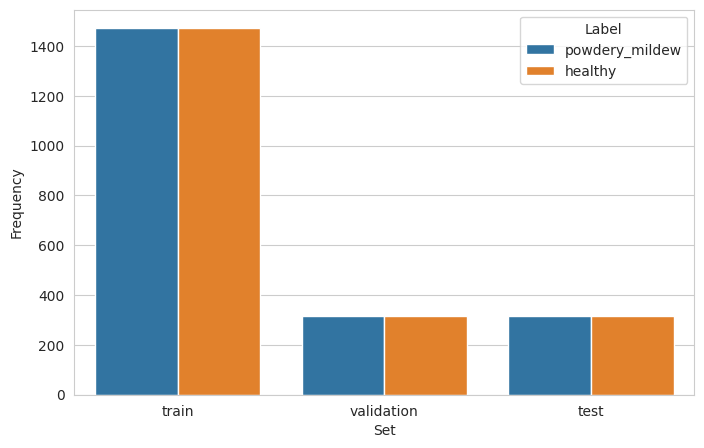

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create an empty dictionary
data = {
    'Set': [],
    'Label': [],
    'Frequency': []
}

# Define the number of rows you want to create
folders = ['train', 'validation', 'test']

# Loop to dynamically create and append rows to the dictionary
for folder in folders:
    for label in labels:
        row = {
            'Set': folder,
            'Label': label,
            'Frequency': int(len(os.listdir(my_data_dir + '/' + folder + '/' + label)))  
        }
        for key, value in row.items():
            data[key].append(value)
        print(
            f"* {folder} - {label}: {len(os.listdir(my_data_dir+'/'+ folder + '/' + label))} images")

# Convert the dictionary to a DataFrame
df_freq = pd.DataFrame(data)

print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f'{file_path}/labels_distribution.png',
            bbox_inches='tight', dpi=150)
plt.show()

---

# Image Data Augmentation

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-04-07 15:27:58.491595: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-07 15:27:58.508575: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 15:27:59.857720: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-07 15:27:59.989296: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744039680.146024    8958 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744039680.21

Initialise ImageDataGenerator for Image Augmentation

In [21]:
augmented_image_data = ImageDataGenerator(rotation_range=20,
                                          width_shift_range=0.10,
                                          height_shift_range=0.10,
                                          shear_range=0.1,
                                          zoom_range=0.1,
                                          horizontal_flip=True,
                                          vertical_flip=True,
                                          fill_mode='nearest',
                                          rescale=1./255
                                          )

Augmenting Training images dataset

In [22]:
batch_size = 10  # Set batch size
train_set = augmented_image_data.flow_from_directory(train_path,
                                                     target_size=image_shape[:2],
                                                     color_mode='rgb',
                                                     batch_size=batch_size,
                                                     class_mode='binary',
                                                     shuffle=True
                                                     )

train_set.class_indices

Found 2944 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augmenting Validation images dataset

In [23]:
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(val_path,
                                                                        target_size=image_shape[:2],
                                                                        color_mode='rgb',
                                                                        batch_size=batch_size,
                                                                        class_mode='binary',
                                                                        shuffle=False
                                                                        )

validation_set.class_indices

Found 630 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augmenting Testing images dataset

In [24]:
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(test_path,
                                                                  target_size=image_shape[:2],
                                                                  color_mode='rgb',
                                                                  batch_size=batch_size,
                                                                  class_mode='binary',
                                                                  shuffle=False
                                                                  )

test_set.class_indices

Found 634 images belonging to 2 classes.


{'healthy': 0, 'powdery_mildew': 1}

Augmented training image

(10, 100, 100, 3)


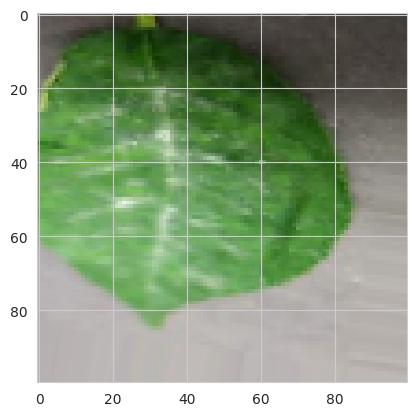

(10, 100, 100, 3)


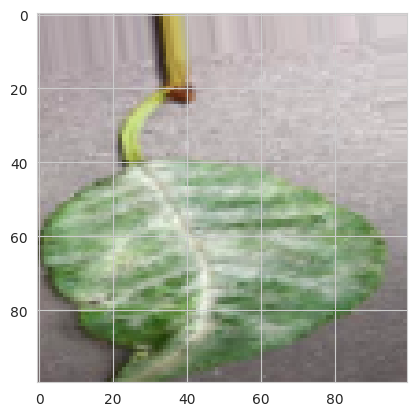

(10, 100, 100, 3)


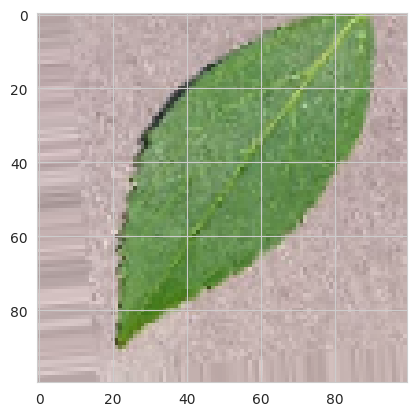

In [25]:
for _ in range(3):
    img, label = next(train_set)
    print(img.shape)  # (1,100,100,3)
    plt.imshow(img[0])
    plt.show()

Augmented Validation image

(10, 100, 100, 3)


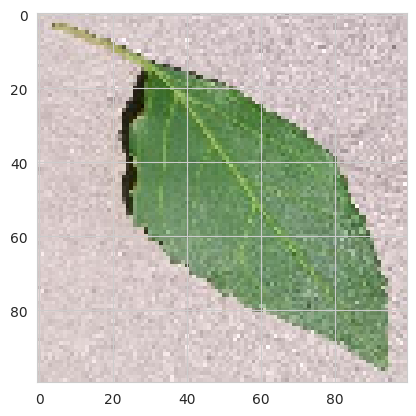

(10, 100, 100, 3)


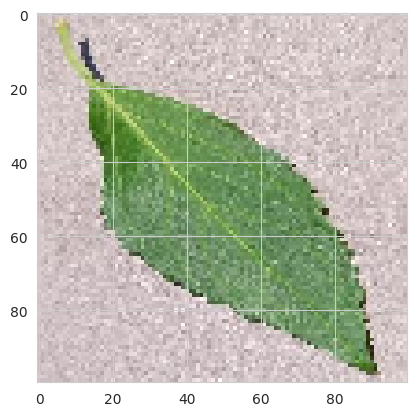

(10, 100, 100, 3)


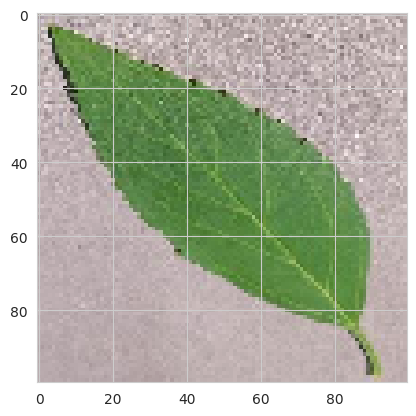

In [26]:
for _ in range(3):
    img, label = next(validation_set)
    print(img.shape)  # (1,100,100,3)
    plt.imshow(img[0])
    plt.show()

Augmented testing image

(10, 100, 100, 3)


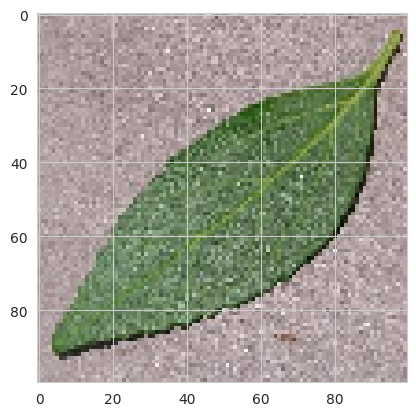

(10, 100, 100, 3)


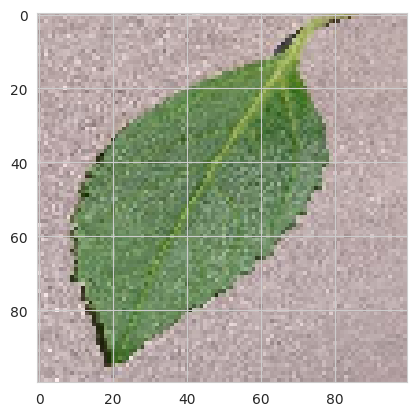

(10, 100, 100, 3)


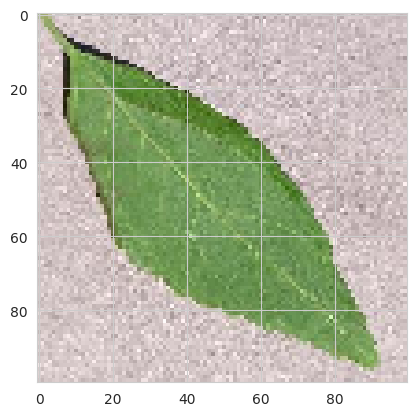

In [27]:
for _ in range(3):
    img, label = next(test_set)
    print(img.shape)  # (1,100,100,3)
    plt.imshow(img[0])
    plt.show()

Save Class Indices

In [28]:
import os
import joblib

# Define the outputs directory
output_path = '/workspaces/PP5-Cherry-Leaves/outputs'

# Ensure the outputs directory exists
os.makedirs(output_path, exist_ok=True)

# Get the next number for the class_indices pickle file to avoid overwriting
file_prefix = 'class_indices'
file_extension = '.pkl'

# List all existing class_indices files
existing_files = [
    f for f in os.listdir(output_path)
    if f.startswith(file_prefix) and f.endswith(file_extension)
]

# Extract numbers from filenames (like class_indices_1.pkl)
existing_numbers = [
    int(f[len(file_prefix) + 1:-len(file_extension)])
    for f in existing_files
    if f[len(file_prefix) + 1:-len(file_extension)].isdigit()
]

# Determine the next number to use
next_number = max(existing_numbers, default=0) + 1
new_filename = f"{file_prefix}_{next_number}{file_extension}"
full_save_path = os.path.join(output_path, new_filename)

# Save the class_indices using joblib
joblib.dump(value=train_set.class_indices, filename=full_save_path)

print(f"✅ class_indices saved to: {full_save_path}")

✅ class_indices saved to: /workspaces/PP5-Cherry-Leaves/outputs/class_indices_1.pkl


---